## Introducción



Los conjuntos de datos que los profesionales de datos utilizan para resolver problemas suelen contener valores faltantes, los cuales deben abordarse para obtener datos limpios y útiles. Esto es particularmente crucial en el análisis exploratorio de datos (EDA). En esta actividad, aprenderás cómo abordar los datos faltantes.

Eres un consultor de datos financieros y un inversionista ha encomendado a tu equipo la tarea de identificar nuevas oportunidades de negocio. Para ayudarles a decidir en qué empresas futuras invertir, proporcionarás una lista de empresas actuales valoradas en más de $1 mil millones. A veces, a estas empresas se les llama "unicornios". Tu cliente utilizará esta información para conocer las empresas rentables en general.

El inversionista te ha pedido que les proporciones los siguientes datos:
- Empresas en la industria de "hardware" con sede en "Beijing", "San Francisco" y "Londres".
- Empresas en la industria de "inteligencia artificial" con sede en "Londres".
- Una lista de los 20 principales países ordenados por la suma de las valoraciones de las empresas en cada país, excluyendo "Estados Unidos", "China", "India" y "Reino Unido".
- Un mapa de valoración global de todos los países excepto "Estados Unidos", "China", "India" y "Reino Unido".

Tu conjunto de datos incluye una lista de empresas y puntos de datos, como el año en que fueron fundadas, su industria y su ciudad, país y continente.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

El conjunto de datos se encuentra actualmente en formato CSV y en un archivo llamado  `Unicorn_Companies.csv` . Como se muestra en esta celda, el conjunto de datos se ha cargado automáticamente para ti. No necesitas descargar el archivo .csv ni proporcionar más código para acceder al conjunto de datos y continuar con esta actividad. Por favor, continúa con esta actividad completando las siguientes instrucciones.

## Exploracion de los datos

In [2]:
df_companies = pd.read_csv('Unicorn_Companies.csv')

In [4]:
df_companies.info()
df_companies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


(1074, 10)

In [5]:
df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


**Pregunta: ¿Cuáles son los tipos de datos de las diferentes columnas?**
- Excepto por la columna  `Year Funded` , que es  `int64` , el tipo de datos de todas las demás columnas es  `object` . Puedes obtener esta información utilizando el método  `info()` .

**Pregunta: ¿Cuántas columnas contienen valores nulos?**
- Las columnas  `City`  y  `Select Investors`  contienen menos valores no nulos que el número total de filas en el conjunto de datos, lo que indica que tienen valores faltantes. Puedes obtener esta información utilizando el método  `info()` .

In [6]:

df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


**Pregunta: ¿En qué año se fundó la empresa más antigua?**
- La empresa más antigua de la lista se fundó en 1919. Este es el valor mínimo en la columna  `Year Funded` . Puedes obtener esta información utilizando el método  `describe()` .

Para poder responder las preguntas del inversionista, se requieren algunos pasos de preprocesamiento de datos. El primer paso es agregar una nueva columna al dataframe que contenga únicamente el año en que cada empresa se convirtió en una empresa unicornio. Llamaremos a esta nueva columna  `Año de Ingreso` .

In [7]:
df_companies['Año de Ingreso'] = pd.to_datetime(df_companies['Date Joined']).dt.year

In [9]:
df_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Año de Ingreso
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


Para cada país, deseas calcular la suma de todas las valoraciones de las empresas de ese país. Sin embargo, para hacer esto, primero debes preparar los datos. Actualmente, los datos en la columna  `Valoración`  son una cadena que comienza con un  `$`  y termina con una  `B` . Debido a que esta columna no está en un tipo de dato numérico, pandas no puede realizar operaciones matemáticas en sus valores. Los datos en esta columna deben convertirse a un tipo de dato numérico.

En este paso, define una función llamada  `str_to_num()`  que acepte como argumento:

*  `x` : una cadena en el formato de los valores contenidos en la columna  `Valoración` 

Y devuelve:

*  `x` : un  `int`  del número representado por la cadena de entrada
Ejemplo:

 [IN]:  str_to_num('$4B')
[OUT]:  4
Para hacer esto, utiliza el método de cadena [ `strip()` ](https://docs.python.org/3/library/stdtypes.html#str.strip). Este método se aplica a una cadena. Su argumento es una cadena que contiene todos los caracteres que deseas eliminar del principio y el final de una cadena dada, en cualquier orden. Los caracteres especificados se eliminarán hasta que se encuentre un carácter válido. Este proceso se aplica avanzando desde el principio de la cadena y también avanzando en reversa desde el final de la cadena, eliminando así los caracteres no deseados del principio y el final.  

Ejemplo:

```python
 [IN]:  mi_cadena = '#....... Sección 3.2.1 Problema #32 .......'
        mi_cadena = mi_cadena.strip('.#! ')
        print(mi_cadena)

[OUT]:  'Sección 3.2.1 Problema #32'
```

Ten en cuenta que debes volver a asignar el resultado a una variable o de lo contrario el cambio no será permanente.

In [11]:
def str_to_num(x):
    x = x.strip('$B')
    x = int(x)

    return x

Ahora, utiliza esta función para crear una nueva columna llamada  `valuation_num`  que represente la columna  `Valoración`  como un valor entero. Para hacer esto, utiliza el método de la serie [ `apply()` ](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) para aplicar la función  `str_to_num()`  a la columna  `Valoración` .

 `apply()`  es un método que se puede utilizar en un objeto  `DataFrame`  o  `Series` . En este caso, lo estás utilizando en la serie  `Valoración` . El método acepta una función como argumento y aplica esa función a cada valor de la serie.

```python
Example:

 [IN]: def square(x):
           return x ** 2

       my_series = pd.Series([0, 1, 2, 3])
       my_series

[OUT]: 0    0
       1    1
       2    2
       3    3
       dtype: int64

[IN]: my_series = my_series.apply(square)
       my_series

[OUT]: 0    0
       1    1
       2    4
       3    9
       dtype: int64
```

Observa que la función que se pasa como argumento al método  `apply()`  no tiene paréntesis. Es solo el nombre de la función.

In [12]:
# Aplica la función  `str_to_num()`  a la columna  `Valuation` 
# y asigna el resultado a una nueva columna llamada  `valuation_num` 

df_companies['valuation_num'] = df_companies['Valuation'].apply(str_to_num)
df_companies[['Valuation', 'valuation_num']].head()

,Valuation,valuation_num
0,$180B,180
1,$100B,100
2,$100B,100
3,$95B,95
4,$46B,46


### Encontrar valores faltantes

El conjunto de datos de las empresas unicornio está bastante limpio, con pocos valores faltantes.

In [13]:
df_companies.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Año de Ingreso       0
valuation_num        0
dtype: int64

**Pregunta: ¿Cuántos valores faltantes hay en cada columna del conjunto de datos?**
- Hay un valor faltante en la columna  `Select Investors`  y 16 ciudades faltantes. No hay valores faltantes en las demás columnas.

Antes de lidiar con los valores faltantes, es importante entender la naturaleza del valor faltante que se está llenando. Muestra todas las filas con valores faltantes de  `df_companies` . Para hacer esto, realiza los siguientes tres pasos:

1. Aplica el método  `isna()`  al dataframe  `df_companies`  como lo hiciste en el paso anterior. Recuerda que esto resulta en un dataframe de la misma forma que  `df_companies` , donde cada valor es  `True`  si su contenido es  `NaN`  y  `False`  si su contenido no es  `NaN` . Asigna los resultados a una variable llamada  `mask` .

In [15]:
# 1. Aplica el método  `isna()`  al dataframe  `df_companies`  y asigna el resultado a  `mask` 
mask = df_companies.isna()
mask.tail()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Año de Ingreso,valuation_num
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False,False


Aún no has terminado. Todavía necesitas pasar de este dataframe de valores booleanos a un dataframe que contenga solo las filas de  `df_companies`  que contienen al menos un valor  `NaN` . Esto significa que necesitas encontrar una forma de encontrar los índices de las filas del dataframe booleano que contienen al menos un valor  `True` , y luego extraer esos índices de  `df_companies` .

Puedes hacer esto utilizando el método [ `any()` ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html) para objetos  `DataFrame` . Este método devuelve una serie booleana que indica si algún valor es  `True`  a lo largo de un eje especificado.

```python
Example:

df =     
        A      B    C
    0   0      a    10
    1   False  0    1
    2   NaN    NaN  NaN


 [IN]: df.any(axis=0)

[OUT]: A    False
       B     True
       C     True
       dtype: bool
       
 [IN]: df.any(axis=1)
 
[OUT]: 0     True
       1     True
       2    False
       dtype: bool
```

Ten en cuenta que  `0` ,  `False`  y  `NaN`  se consideran  `False` , mientras que cualquier otro valor se considera  `True` .

2. Aplica el método  `any()`  al dataframe booleano que creaste para crear una serie booleana donde cada elemento de la serie representa  `True`  si una fila del dataframe contiene algún valor  `True`  y  `False`  si alguna fila del dataframe contiene algún valor  `False` . Asigna los resultados nuevamente a  `mask` .

In [16]:
# 2. Aplica el método  `any()`  a  `mask`  y asigna los resultados nuevamente a  `mask` 

mask = mask.any(axis=1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

3. Debido a que  `mask`  ahora es una serie de valores booleanos, puedes usarlo como una máscara booleana. Aplica la máscara booleana al dataframe  `df_companies`  para devolver un dataframe filtrado que contenga solo las filas que contienen un valor faltante. Asigna los resultados a una variable llamada  `df_missing_rows` .

In [17]:
df_missing_rows = df_companies[mask]
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Año de Ingreso,valuation_num
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Pregunta: ¿Hay algún país o región específica que aparezca mucho en este dataframe de valores faltantes? ¿Cuál?**
- Doce de las 17 filas con valores faltantes son para empresas de Singapur.


**Pregunta: ¿Qué pasos tomaste para encontrar los datos faltantes?**
-  `DataFrame.isna()`  devolverá un dataframe booleano que indica cada ubicación que es  `NaN`  con  `True` .
- Puedes usar  `sum()`  junto con  `isna()`  para obtener el conteo de valores  `NaN`  en cada columna.
- Puedes usar  `any()`  junto con  `isna()`  para crear una máscara booleana, que se puede aplicar al dataframe original para obtener solo las filas con al menos un valor  `NaN` .

**Pregunta: ¿Qué observaciones se pueden hacer sobre las formas y el contexto de los datos faltantes?**
- Los valores faltantes pueden tener diferentes formas y suelen ser específicos del contexto. No todos los valores faltantes están etiquetados como  `na` ,  `None`  o  `Null` .

**Pregunta: ¿Qué otros métodos podrías utilizar para abordar los datos faltantes?**
- Si es posible, consulta a los usuarios de negocio para obtener información sobre las causas de los valores faltantes y, si es posible, adquiere conocimiento del dominio para imputar inteligentemente estos valores.

## Construcción del modelo


Piensa en el modelo que estás construyendo como el conjunto de datos completo, que luego utilizarás para responder las preguntas que te ha formulado el inversor.

### Dos formas de abordar los valores faltantes

Existen varias formas de abordar los valores faltantes, lo cual es fundamental en el EDA (Análisis Exploratorio de Datos). Los dos métodos principales son eliminarlos e imputar otros valores en su lugar. La elección del método adecuado depende del problema empresarial y del valor que la solución agregará o eliminará del conjunto de datos.

Aquí, probarás ambos métodos.

Para comparar el efecto de diferentes acciones, primero guarda el número original de valores en una variable. Crea una variable llamada  `count_total`  que sea un entero que represente el número total de valores en  `df_companies` . Por ejemplo, si el dataframe tuviera 5 filas y 2 columnas, este número sería 10.

In [18]:
count_total = df_companies.size
count_total

12888

Ahora, elimina todas las filas que contengan valores faltantes y guarda el número total de valores restantes en una variable llamada  `count_dropna_rows` .

In [19]:
count_dropna_rows = df_companies.dropna().size
count_dropna_rows

12684

Ahora, elimina todas las columnas que contengan valores faltantes y guarda el número total de celdas en una variable llamada  `count_dropna_columns` .

In [21]:

count_dropna_columns = df_companies.dropna(axis=1).size
count_dropna_columns

10740

In [22]:

row_percent = (count_total - count_dropna_rows) / count_total
print(f'Percentage removed, rows: {row_percent:.3f}')



col_percent = (count_total - count_dropna_columns) / count_total
print(f'Percentage removed, columns: {col_percent:.3f}')


Percentage removed, rows: 0.016
Percentage removed, columns: 0.167


**Pregunta: ¿Cuál método fue más efectivo? ¿Por qué?**

El porcentaje eliminado fue significativamente mayor para las columnas que para las filas. Dado que ambos enfoques resultan en un conjunto de datos sin valores faltantes, el método "más efectivo" depende de cuántos datos tengas y qué quieres hacer con ellos. Podría ser mejor utilizar el método que deja la mayor cantidad de datos intactos, en este caso, eliminar filas. O, si no tienes muchas muestras y no quieres perder ninguna, pero no necesitas todas tus columnas, entonces eliminar columnas podría ser lo mejor. Con estos datos, probablemente sea mejor eliminar filas en la mayoría de los casos.


Ahora, practica el segundo método: imputación. Realiza los siguientes pasos:

1. Utiliza el método de dataframe [ `fillna()` ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) para rellenar cada valor faltante con el siguiente valor no NaN en su columna. Asigna los resultados a un nuevo dataframe llamado  `df_companies_backfill` .

```python
Example:

df =     
        A    B    C
    0   5    a    NaN
    1   10   NaN  False
    2   NaN  c    True

 [IN]: df.fillna(method='backfill')
 
[OUT]: 
        A    B    C
    0   5    a    False
    1   10   c    False
    2   NaN  c    True

```

1. Observa que si hay un valor  `NaN`  en la última fila, no se rellenará hacia atrás porque no hay un valor posterior en la columna al cual hacer referencia.

2. Muestra las filas que anteriormente tenían valores faltantes.

In [25]:
df_companies_backfill = df_companies.fillna(method='backfill')

In [27]:
df_companies_backfill.iloc[df_missing_rows.index, :]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Año de Ingreso,valuation_num
12,FTX,$32B,7/20/21,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Pregunta: ¿Tienen sentido los valores que se utilizaron para rellenar los valores faltantes?**
- No, los valores parecen haberse agregado sin tener en cuenta el país en el que se encuentran esas ciudades.

Otra opción es llenar los valores con un valor determinado, como 'Desconocido'. Sin embargo, hacer esto no agrega ningún valor al conjunto de datos y podría dificultar la búsqueda de los valores faltantes en el futuro. Al revisar los valores faltantes en este conjunto de datos, determinamos que está bien dejar los valores como están. Esto también evita agregar sesgo al conjunto de datos.

## Resultados y evaluaciones

### Empresas en la industria de  `Hardware` 



Tu inversor está interesado en identificar empresas unicornio en la industria de  `Hardware`  en las siguientes ciudades:  `Beijing` ,  `San Francisco`  y  `Londres` . También están interesados en empresas en la industria de  `Inteligencia Artificial`  en  `Londres` .

Escribe una declaración de selección que extraiga las filas que cumplan con estos criterios. Esta tarea requiere una lógica condicional compleja. Divide el proceso en las siguientes partes.

1. Crea una máscara para aplicar al dataframe  `df_companies` . La siguiente lógica es una representación de pseudo-código de cómo podría estructurarse esta máscara.

```python
((Industry==Hardware) and (City==Beijing, San Francisco, or London)) 
OR  
((Industry==Artificial intelligence) and (City==London))
```

Estás familiarizado/a con cómo crear máscaras booleanas basadas en lógica condicional en pandas. Sin embargo, es posible que no sepas cómo escribir una declaración condicional que seleccione filas que tengan _cualquiera de varios valores posibles_ en una columna dada. En este caso, se trata de la parte  `(Ciudad==Beijing, San Francisco o Londres)`  de la expresión.

Para este tipo de construcción, utiliza el método [ `isin()` ](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) de la serie. Este método se aplica a una serie de pandas y, para cada valor en la serie, verifica si es miembro de lo que se pasa como argumento.

```python
Example:

 [IN]: my_series = pd.Series([0, 1, 2, 3])
       my_series
       
[OUT]: 0    0
       1    1
       2    2
       3    3
       dtype: int64
       
 [IN]: my_series.isin([1, 2])
       
[OUT]: 0    False
       1     True
       2     True
       3    False
       dtype: bool
       
```

2. Aplica la máscara al dataframe  `df_companies`  y asigna el resultado a una nueva variable llamada  `df_invest` .

In [28]:
cities = ['Beijing', 'San Francisco', 'London']
mask = (
    (df_companies['Industry']=='Hardware') & (df_companies['City'].isin(cities))
) | (
    (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London')
)


df_invest = df_companies[mask]
df_invest

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Año de Ingreso,valuation_num
36,Bitmain,$12B,7/6/18,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,12/22/16,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,12/16/21,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
845,Density,$1B,11/10/21,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1
873,BenevolentAI,$1B,6/2/15,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
923,Geek+,$1B,11/21/18,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,10/25/18,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1
1046,Tractable,$1B,6/16/21,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1


**Pregunta: ¿Cuántas empresas cumplen con los criterios establecidos por el inversor?**
- Ocho empresas cumplen con los criterios establecidos.


### Lista de la suma de valores por cada pais

Para cada país, suma las valoraciones de todas las empresas en ese país, luego ordena los resultados en orden descendente según la valoración total. Asigna los resultados a una variable llamada  `national_valuations` .

In [29]:

national_valuations = df_companies.groupby(['Country/Region'])['valuation_num'].sum(
).sort_values(ascending=False).reset_index()

national_valuations.head(15)

,Country/Region,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


**Pregunta: ¿Qué países tienen la suma más alta de valoración?**

Los datos ordenados indican que los cuatro países con las valoraciones totales más altas son Estados Unidos, China, India y Reino Unido. Sin embargo, su inversor especificó que estos países no deben incluirse en la lista porque son valores atípicos.

### Filtrar los 4 principales países atípicos



Utiliza estos datos agrupados y sumados para crear un gráfico de barras. Sin embargo, para satisfacer las necesidades de tu interesado, debes eliminar primero a Estados Unidos, China, India y Reino Unido. Elimina estos países de  `national_valuations`  y asigna los resultados a una variable llamada  `national_valuations_no_big4` .

In [30]:
national_valuations_no_big4 = national_valuations.iloc[4:, :]

national_valuations_no_big4.head()

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


### CONTENIDO ADICIONAL: Enfoque alternativo (opcional)



También puedes usar  `isin()`  para crear una máscara booleana y filtrar valores específicos de la columna  `Country/Region` . En este caso, este proceso es más largo y complicado que simplemente usar la instrucción iloc[]. Sin embargo, habrá situaciones en las que este sea el enfoque más directo.

¿Cómo podrías usar  `isin()`  y tus conocimientos sobre operadores condicionales y máscaras booleanas de pandas para lograr la misma tarea?

In [31]:
mask = ~national_valuations['Country/Region'].isin(['United States', 'China', 'India', 'United Kingdom'])
national_valuations_no_big4 = national_valuations[mask]
national_valuations_no_big4.head()

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


### Crear un barplot para el top 20 sin los 4 paises grandes

Ahora, los datos están listos para revelar los 20 países no pertenecientes a los "Big 4" con las mayores valoraciones totales de empresas. Utiliza la función [ `barplot()` ](https://seaborn.pydata.org/generated/seaborn.barplot.html) de seaborn para crear un gráfico que muestre la valoración nacional en un eje y el país en el otro.


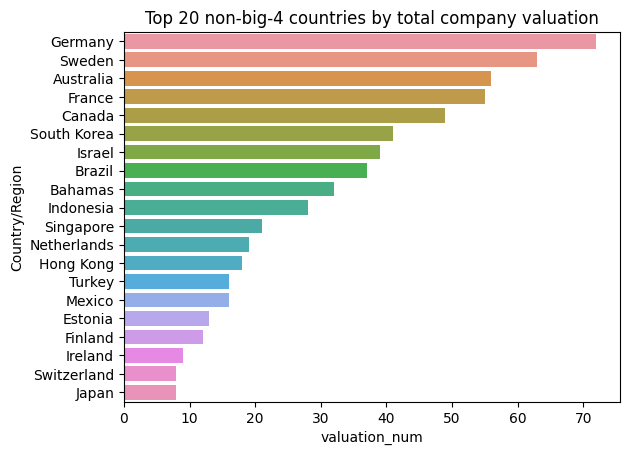

In [32]:
sns.barplot(data=national_valuations_no_big4.head(20),
            y='Country/Region',
            x='valuation_num')
plt.title('Top 20 non-big-4 countries by total company valuation')
plt.show()

### Plot maps

Tu inversor también ha solicitado un mapa de valoración global de todos los países excepto  `Estados Unidos` ,  `China` ,  `India`  y  `Reino Unido`  (también conocidos como los "cuatro grandes países").

Has aprendido a utilizar [ `scatter_geo()` ](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo) de la biblioteca  `plotly.express`  para crear datos de trazado en un mapa. Crea un gráfico  `scatter_geo()`  que represente las valoraciones totales de cada país que no sea de los cuatro grandes en un mapa mundial, donde cada valoración se muestra como un círculo en el mapa y el tamaño del círculo es proporcional a la valoración sumada de ese país.

**NOTA:** La salida del siguiente código es un gráfico dinámico que requiere que ejecutes el código para mostrarlo. Para hacer esto, ve al menú "Cell" en la parte superior de la página y selecciona "Run All".

In [33]:
data = national_valuations_no_big4

px.scatter_geo(data, 
               locations='Country/Region', 
               size='valuation_num', 
               locationmode='country names', 
               color='Country/Region',
               title='Total company valuations by country (non-big-four)')


**Pregunta: ¿Cómo se visualiza la suma de valoraciones por país en el gráfico?**
- La suma de valoraciones por país se visualiza mediante el tamaño de los círculos alrededor del mapa.

**Pregunta: ¿Hay alguna región que destaque por tener mucha actividad?**
- Europa tiene muchas empresas unicornio en un área concentrada.

## Conclusion

**¿Cuáles son algunas de las lecciones clave que aprendiste durante este laboratorio?**
* Los datos faltantes son un problema común para los profesionales de datos cada vez que trabajan con una muestra de datos.
* Abordar los valores faltantes es parte del proceso de limpieza de datos y un paso importante en el EDA (Análisis Exploratorio de Datos).
* Aborda los valores faltantes eliminándolos o completándolos.
* Al considerar cómo abordar los valores faltantes, ten en cuenta el negocio, los datos y las preguntas que se deben responder. Asegúrate siempre de no introducir sesgos en el conjunto de datos.
* Abordar los valores faltantes te permitió responder las preguntas de tu inversor.

**¿Cómo presentarías tus hallazgos de este laboratorio a otros? Considera la información que proporcionarías (y la que omitirías), cómo compartirías las diferentes ideas obtenidas de los datos y cómo las visualizaciones de datos podrían ayudar a tu presentación.**
* Para las empresas específicas de la industria en ciertas ubicaciones, podrías proporcionar una breve lista de nombres de empresas y ubicaciones.
* Para los 20 países principales por suma de valoraciones, podrías utilizar el gráfico que creaste en este laboratorio o compartir una lista.
* Para los 20 países principales ordenados por la suma de valoraciones de las empresas en cada país, excluirías  `Estados Unidos` ,  `China` ,  `India`  y  `Reino Unido` .
* Para las preguntas relacionadas con el mapa de valoraciones, además de tus visualizaciones, proporcionarías un breve resumen de los puntos de datos. Esto se debe a que el inversor no solicitó un desglose adicional de estos datos.

**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)
